# **Building CNN Model for Classification Of Flowers**

**Download the dataset [here](https://drive.google.com/file/d/1xkynpL15pt6KT3YSlDimu4A5iRU9qYck/view).**



# Unzip data

In [1]:
!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

# 1. Image Augmentation

In [2]:
#import lib.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#augmentation on flowers 

rose_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [4]:
tulip_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [5]:
xrose = rose_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [6]:
xtulip = tulip_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


# 2. Creating a Model

In [7]:
#import lib.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

# 3. Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [8]:
# Add a layers

model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer

# 4. Compile The Model

In [9]:
# Compiling the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# 5. Fit The Model

In [10]:
model.fit_generator(xrose,
                    steps_per_epoch=len(xrose),
                    epochs=10,
                    validation_data=xtulip,
                    validation_steps=len(xtulip))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
44/44 [==============================] - 51s 1s/step - loss: 1.4756 - accuracy: 0.4195 - val_loss: 1.1055 - val_accuracy: 0.5603
Epoch 2/10
44/44 [==============================] - 49s 1s/step - loss: 1.0705 - accuracy: 0.5768 - val_loss: 1.0033 - val_accuracy: 0.6057
Epoch 3/10
44/44 [==============================] - 49s 1s/step - loss: 0.9819 - accuracy: 0.6185 - val_loss: 0.9098 - val_accuracy: 0.6562
Epoch 4/10
44/44 [==============================] - 49s 1s/step - loss: 0.9391 - accuracy: 0.6379 - val_loss: 0.8542 - val_accuracy: 0.6690
Epoch 5/10
44/44 [==============================] - 49s 1s/step - loss: 0.8588 - accuracy: 0.6639 - val_loss: 0.7960 - val_accuracy: 0.6915
Epoch 6/10
44/44 [==============================] - 49s 1s/step - loss: 0.8161 - accuracy: 0.6884 - val_loss: 0.8063 - val_accuracy: 0.6799
Epoch 7/10
44/44 [==============================] - 49s 1s/step - loss: 0.7679 - accuracy: 0.7012 - val_loss: 0.7419 - val_accuracy: 0.7165
Epoch 8/10
44/44 [==

# 6. Save The Model

In [11]:
model.save('rose.h5')

# 7.  Test The Model

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#testing 1
img = image.load_img('/content/flowers/sunflower/12471443383_b71e7a7480_m.jpg',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['daisy','dandelion','rose','sunflower','tulip'] # Creating list
op[pred] # List indexing with output

'sunflower'

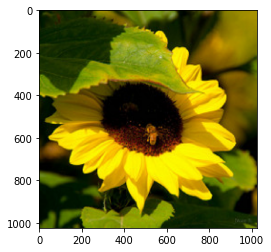

In [14]:
img = image.load_img('/content/flowers/sunflower/12471443383_b71e7a7480_m.jpg',target_size=(1024,1024))
plt.imshow(img)

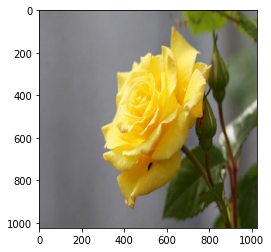

In [15]:
img = image.load_img('/content/flowers/rose/14145188939_b4de638bd3_n.jpg',target_size=(1024,1024))
plt.imshow(img)